# plot the results of bagging predicitons

## Setups:

   1. Baseline: no group bagging and individual bagging (Foder: Bagging_prediction_Results_Big_Setup, Group_BS:0 and TS_BS:0)
   2. Big run: group bagging + individual bagging (Foder: Bagging_prediction_Results_Big_Setup)
   3. Individual bagging only: 
   3. Group bagging only:
   4. Group bagging with one individual bagging.

### Notes: Each of the above setup has 5, 10, 30, and 60 minuets. 


# Get the reuslts from S3:
aws s3 sync s3://fcp-indi/data/uploads/CPAC_HNU/share/Bagging_prediction_Results_overall/ /Users/lei.ai/Documents/projects/Bagging_Predictiton/Update_Sep_2020/Bagging_prediction_Results_overall


aws s3 sync s3://fcp-indi/data/uploads/CPAC_HNU/share/Bagging_prediction_Results_latest /Users/lei.ai/Documents/projects/Bagging_Predictiton/Update_Sep_2020/Bagging_prediction_Results_Big_Setup

# baseline:
aws s3 sync s3://fcp-indi/data/uploads/CPAC_HNU/share/Bagging_prediction_Results/Baseline/time_duraiton_5/GroupBS_0/TimeSeriesBS-0 /Users/lei.ai/Documents/projects/Bagging_Predictiton/Update_Sep_2020/Baseline


# reget data
while true;do
    aws s3 sync s3://fcp-indi/data/uploads/CPAC_HNU/share/Bagging_prediction_Results_overall/Results_Group_BS_TS_Once_Update /Users/lei.ai/Documents/projects/Bagging_Predictiton/Update_Sep_2020/Bagging_prediction_Results_overall/Results_Group_BS_TS_Once_Update
    
    aws s3 sync s3://fcp-indi/data/uploads/CPAC_HNU/share/Bagging_prediction_Results_overall/Results_Group_BS_Only_update /Users/lei.ai/Documents/projects/Bagging_Predictiton/Update_Sep_2020/Bagging_prediction_Results_overall/Results_Group_BS_Only_update
    
    echo Sleep 5min
    sleep 300
done

Baseline
(3.0751317869625563, 0.1788091208937505, 0.20940687513860679)
(2.9824407458344746, 0.17399271616358897, 0.27795411565402284)
(2.9169462220143045, 0.1781750395730795, 0.3280633065221527)
(2.874611436193517, 0.1899232966302449, 0.3433150730340139)
Individual Bagging with FC aggregation
(3.078784358420115, 0.17900823406383867, 0.20916158206657853)
(2.982781437361959, 0.1746865933743587, 0.27734584284732294)
(2.91131742417715, 0.17889327629347887, 0.33117264569828847)
(2.87240516465823, 0.18940700141788894, 0.34555964392783445)
Individual Bagging with Prediction aggregation
(3.053301263365733, 0.1768135513513316, 0.21949524095121625)
(2.9579731792202995, 0.17613365668995512, 0.28926751281307533)
(2.9082376634593974, 0.1821904229005265, 0.33323488380158417)
(2.8688307583126527, 0.1885917432322948, 0.3469616443441313)


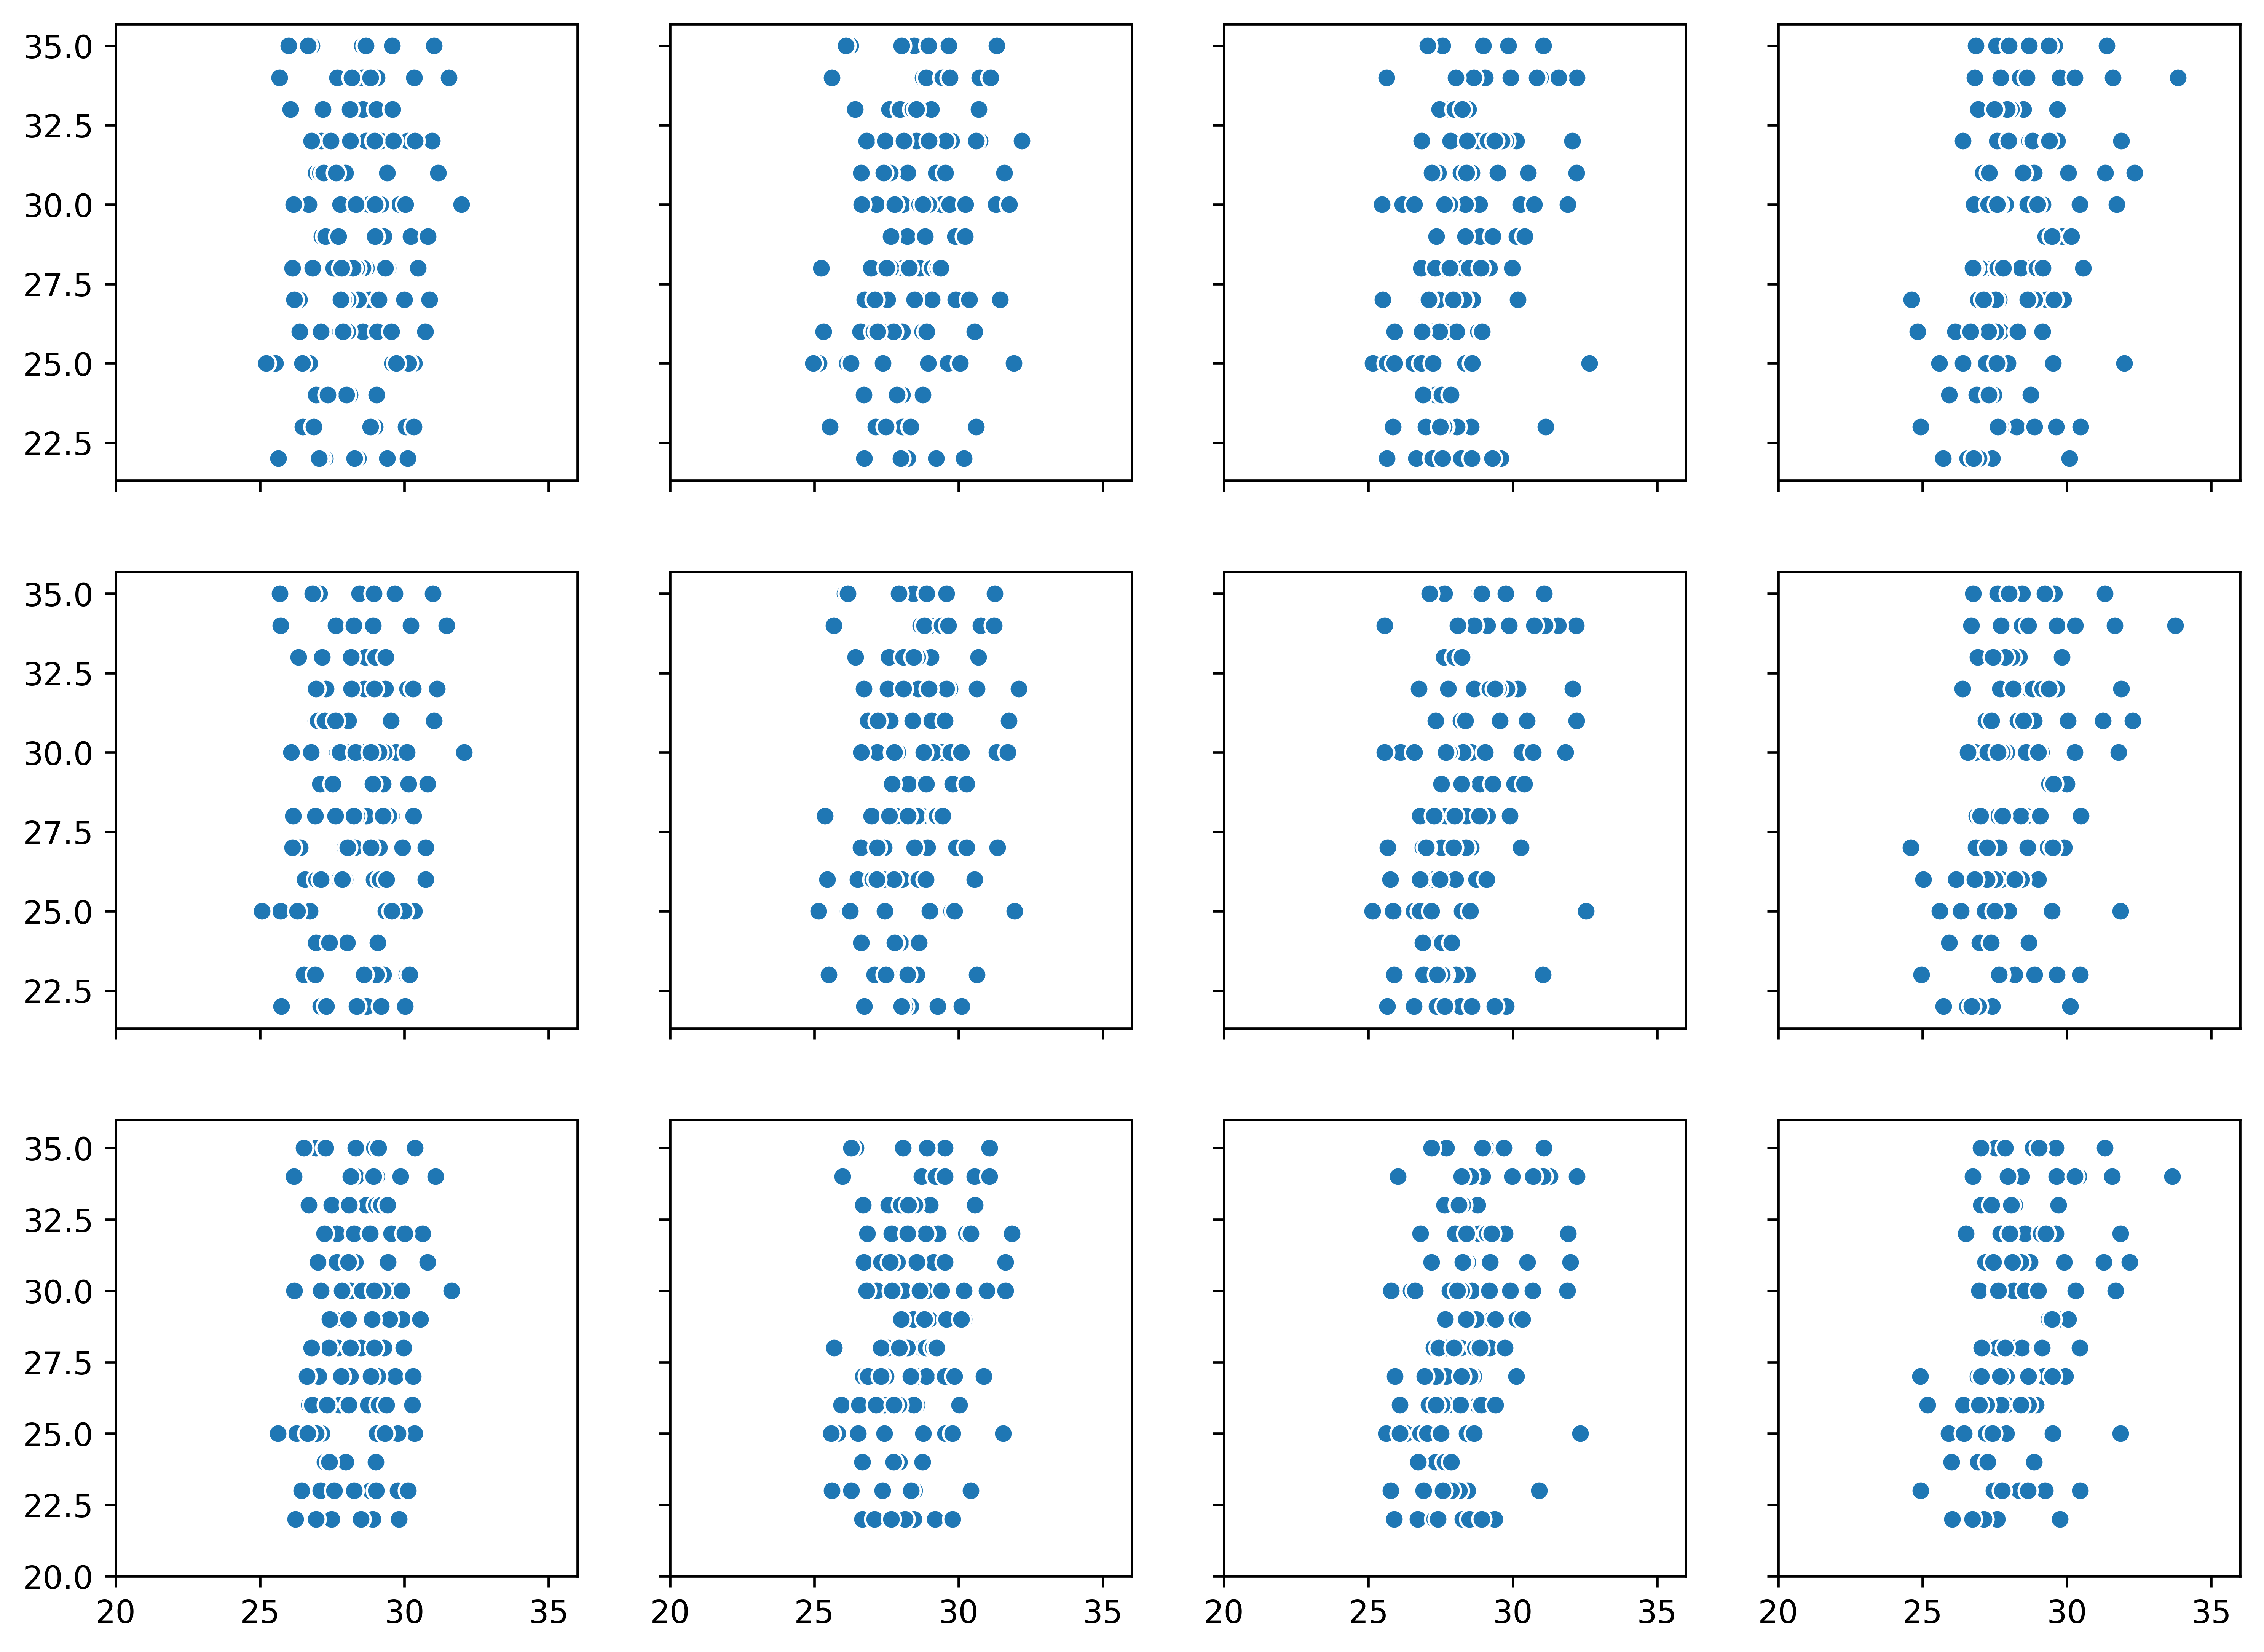

In [124]:
import os
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

################# Baseline model:
print('Baseline')
fig, axs = plt.subplots(3,4,figsize=(12,9),sharex=True,sharey='row',dpi=600)
plt.xlim([20,36])
plt.ylim([20,36])


num_plot=0
for time_duration in [5,10,30,60]:
    datain='Bagging_prediction_Results_overall/Results_TS_BS_only/Aggregate_Prediction/time_duraiton_'+str(time_duration)+'/GroupBS_0/TimeSeriesBS-0' 

    # /data3/aki/bagging_prediction/Results/SVR_Base/predict_base_random_seed_1.txt
    mse_base=[]
    corr_base=[]
    idx=0
    for i in range(1,51):
        f=datain + '/Test_predict_randomTTS_'+str(i)+'.txt'
        f_y=datain + '/Test_real_randomTTS_'+str(i)+'.txt'
        if os.path.isfile(f) and os.path.isfile(f_y):
            #print(f)
            predict=np.genfromtxt(f)
            y_test=np.genfromtxt(f_y)
            mse_base.append(np.mean(np.abs(predict-y_test)))
            corr_base.append(np.corrcoef(predict,y_test)[0,1])
    #sns.scatterplot(predict,y_test,color='black')
    print(np.mean(mse_base),np.std(mse_base),np.mean(corr_base))
    if time_duration == 5:
        data_base=pd.concat([pd.DataFrame({"Type":'Base:'+str(time_duration)+'Min',"MAE":mse_base,"Correlation":corr_base})])
    else:
        data_base=pd.concat([data_base,pd.DataFrame({"Type":'Base:'+str(time_duration)+'Min',"MAE":mse_base,"Correlation":corr_base})])
    sns.scatterplot(predict,y_test,ax=axs[0,num_plot])
    num_plot +=  1
    
####################  Time series BS only with FC aggregate
print('Individual Bagging with FC aggregation')

num_plot=0
for time_duration in [5,10,30,60]:
    datain='Bagging_prediction_Results_overall/Results_TS_BS_only/Aggregate_FC/time_duraiton_'+str(time_duration)+'/GroupBS_0' 
    # /data3/aki/bagging_prediction/Results/SVR_Base/predict_base_random_seed_1.txt
    mse_base=[]
    corr_base=[]
    idx=0
    for i in range(1,51):
        f=datain + '/Test_predict_randomTTS_'+str(i)+'.txt'
        f_y=datain + '/Test_real_randomTTS_'+str(i)+'.txt'
        if os.path.isfile(f) and os.path.isfile(f_y):
            #print(f)
            predict=np.genfromtxt(f)
            y_test=np.genfromtxt(f_y)
            mse_base.append(np.mean(np.abs(predict-y_test)))
            corr_base.append(np.corrcoef(predict,y_test)[0,1])
    #sns.scatterplot(predict,y_test,color='black')
    print(np.mean(mse_base),np.std(mse_base),np.mean(corr_base))
    if time_duration == 5:
        data_ts_fc=pd.concat([pd.DataFrame({"Type":'TS_FC:'+str(time_duration)+'Min',"MAE":mse_base,"Correlation":corr_base})])
    else:
        data_ts_fc=pd.concat([data_ts_fc,pd.DataFrame({"Type":'TS_FC:'+str(time_duration)+'Min',"MAE":mse_base,"Correlation":corr_base})])
    sns.scatterplot(predict,y_test,ax=axs[1,num_plot])
    num_plot +=  1 


####################  Time series BS only with prediction aggregate
print('Individual Bagging with Prediction aggregation')

import os
import numpy as np

num_TS_BS=280
num_plot = 0
for time_duration in [5,10,30,60]:
    datainbase='Bagging_prediction_Results_overall/Results_TS_BS_only/Aggregate_Prediction/time_duraiton_'+str(time_duration)+'/GroupBS_0/TimeSeriesBS-' 

    # /data3/aki/bagging_prediction/Results/SVR_Base/predict_base_random_seed_1.txt
    mse_base=[]
    corr_base=[]
    for i in range(1,51):
        #print('Train-split: '+str(i))
        idx=0
        for tsbs in range(1,num_TS_BS+1):
            datain=datainbase + str(tsbs)
            # /data3/aki/bagging_prediction/Results/SVR_Bagging_2/predict_bs_0_random_seed_1.txt
            f=datain + '/Test_predict_randomTTS_'+str(i)+'.txt'
            f_y=datain + '/Test_real_randomTTS_'+str(i)+'.txt'
            if os.path.isfile(f) and os.path.isfile(f_y):
                predict_tmp=np.genfromtxt(f)
                y_test=np.genfromtxt(f_y)
                if idx==0:
                    predict=predict_tmp
                else:
                    predict = predict + predict_tmp
                idx += 1
        predict=predict/float(idx)
        mse_base.append(np.mean(np.abs(predict-y_test)))
        corr_base.append(np.corrcoef(predict,y_test)[0,1])
    print(np.mean(mse_base),np.std(mse_base),np.mean(corr_base))
    if time_duration ==5:
        data_ts_predict=pd.concat([pd.DataFrame({"Type":'TS_Predict:'+str(time_duration)+'Min',"MAE":mse_base,"Correlation":corr_base})])
    else:
        data_ts_predict=pd.concat([data_ts_predict,pd.DataFrame({"Type":'TS_Predict:'+str(time_duration)+'Min',"MAE":mse_base,"Correlation":corr_base})])
    sns.scatterplot(predict,y_test,ax=axs[2,num_plot])
    num_plot +=  1



Text(0.5,1,'Correlation')

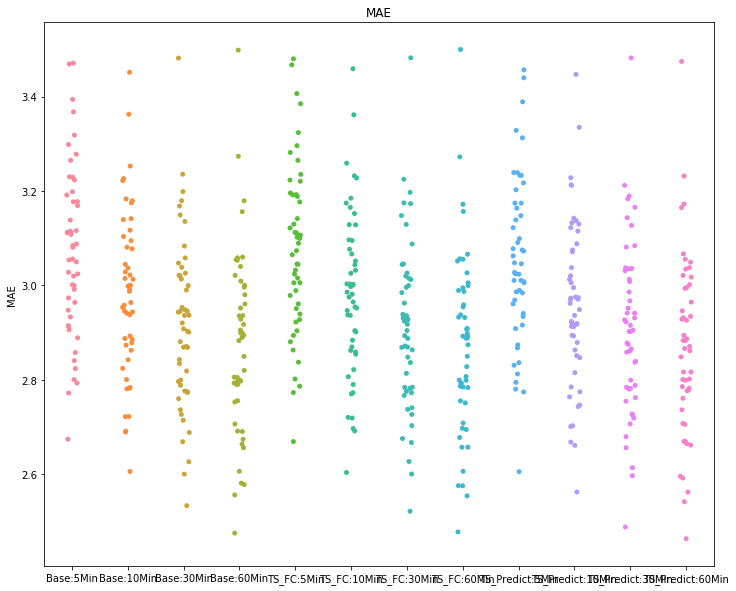

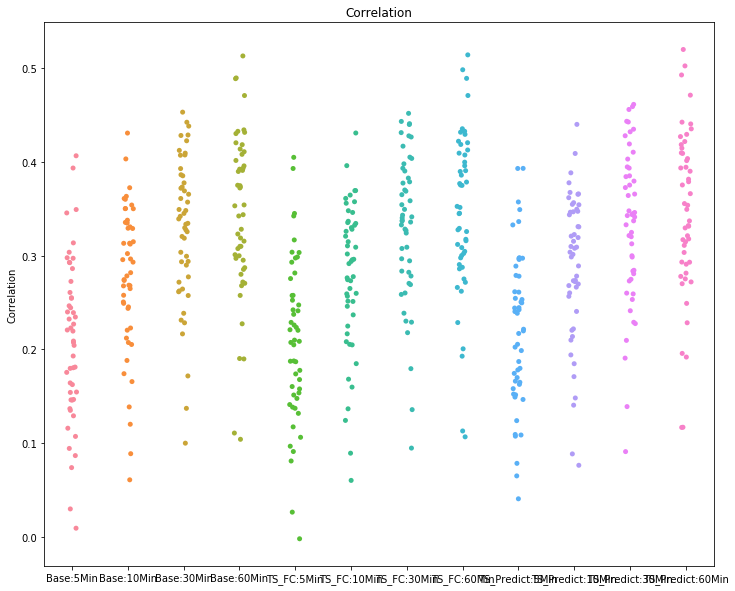

In [126]:
data_all=pd.concat([data_base,data_ts_fc,data_ts_predict])
fig = plt.figure(figsize=(12,10)) # default is (8,6)
sns.stripplot(x="Type", y="MAE", data=data_all)
plt.xlabel('')
plt.title('MAE')

fig = plt.figure(figsize=(12,10)) # default is (8,6)
sns.stripplot(x="Type", y="Correlation", data=data_all)
plt.xlabel('')
plt.title('Correlation')

In [127]:
# Kruskal-Wallis Test
## don't think it is approproate since the data are pared.
from scipy.stats import kruskal

typename='TS_Predict:'
print(typename)
for timedurattion in [5,10,30,60]:
    print(kruskal(data_all['MAE'][data_all['Type']=='Base:'+str(timeduration)+'Min'],data_all['MAE'][data_all['Type']==typename+str(timeduration)+'Min']))

typename='TS_FC:'
print(typename)
for timedurattion in [5,10,30,60]:
    print(kruskal(data_all['MAE'][data_all['Type']=='Base:'+str(timeduration)+'Min'],data_all['MAE'][data_all['Type']==typename+str(timeduration)+'Min']))
    
    

SyntaxError: invalid syntax (<ipython-input-127-271b19c1cc5b>, line 4)

In [118]:
# Wilcoxon test. data is paired.
from scipy.stats import wilcoxon
typename='TS_Predict:'
print(typename)
for timedurattion in [5,10,30,60]:
    print(wilcoxon(data_all['MAE'][data_all['Type']=='Base:'+str(timeduration)+'Min'],data_all['MAE'][data_all['Type']==typename+str(timeduration)+'Min']))

typename='TS_FC:'
print(typename)
for timedurattion in [5,10,30,60]:
    print(wilcoxon(data_all['MAE'][data_all['Type']=='Base:'+str(timeduration)+'Min'],data_all['MAE'][data_all['Type']==typename+str(timeduration)+'Min']))
    
    

WilcoxonResult(statistic=177.0, pvalue=8.775508182574744e-06)
WilcoxonResult(statistic=42.0, pvalue=9.002403196420849e-09)
WilcoxonResult(statistic=255.0, pvalue=0.00022216596965950796)
WilcoxonResult(statistic=385.0, pvalue=0.01479114239356432)


# OLD

In [98]:
## Group bagging multipe times
import os
import numpy as np

num_g_BS=120

for time_duration in [60]:
    datainbase='Bagging_prediction_Results_overall/Results_Group_BS_Only_Update/Aggregate_Prediction/time_duraiton_'+str(time_duration)+'/GroupBS-' 

    # /data3/aki/bagging_prediction/Results/SVR_Base/predict_base_random_seed_1.txt
    mse_base=[]
    corr_base=[]
    for i in range(1,51):
        #print('Train-split: '+str(i))
        idx=0
        for gbs in range(1,num_g_BS+1):
            datain=datainbase + str(gbs)
            # /data3/aki/bagging_prediction/Results/SVR_Bagging_2/predict_bs_0_random_seed_1.txt
            f=datain + '/Test_predict_randomTTS_'+str(i)+'.txt'
            f_y=datain + '/Test_real_randomTTS_'+str(i)+'.txt'
            if os.path.isfile(f) and os.path.isfile(f_y):
                predict_tmp=np.genfromtxt(f)
                y_test=np.genfromtxt(f_y)
                if idx==0:
                    predict=predict_tmp
                else:
                    predict = predict + predict_tmp
                idx += 1
        predict=predict/float(idx)
        mse_base.append(np.mean(np.abs(predict-y_test)))
        corr_base.append(np.corrcoef(predict,y_test)[0,1])
    print(np.mean(mse_base),np.std(mse_base),np.mean(corr_base))


(2.8586778447111407, 0.18744541689805208, 0.3662541350532338)


In [48]:
## Group bagging multipe times with justo ne time series BS
import os
import numpy as np

num_g_BS=280

for time_duration in [5,10,30,60]:
    datainbase='Bagging_prediction_Results_overall/Results_Group_BS_TS_Once/Aggregate_Prediction/time_duraiton_'+str(time_duration)+'/GroupBS-' 

    # /data3/aki/bagging_prediction/Results/SVR_Base/predict_base_random_seed_1.txt
    mse_base=[]
    corr_base=[]
    for i in range(1,51):
        #print('Train-split: '+str(i))
        idx=0
        for gbs in range(1,num_g_BS+1):
            datain=datainbase + str(gbs)
            # /data3/aki/bagging_prediction/Results/SVR_Bagging_2/predict_bs_0_random_seed_1.txt
            f=datain + '/Test_predict_randomTTS_'+str(i)+'.txt'
            f_y=datain + '/Test_real_randomTTS_'+str(i)+'.txt'
            if os.path.isfile(f) and os.path.isfile(f_y):
                predict_tmp=np.genfromtxt(f)
                y_test=np.genfromtxt(f_y)
                if idx==0:
                    predict=predict_tmp
                else:
                    predict = predict + predict_tmp
                idx += 1
        predict=predict/float(idx)
        mse_base.append(np.mean(np.abs(predict-y_test)))
        corr_base.append(np.corrcoef(predict,y_test)[0,1])
    print(np.mean(mse_base),np.std(mse_base),np.mean(corr_base))


(3.1686822002031563, 0.17637145419898245, -0.0017217031396630379)
(3.1697068581796675, 0.17599520409242578, -0.009243559778676563)
(3.1699855917768667, 0.17659763610849957, -0.01696451304558119)
(3.166363906233199, 0.1767772840564327, 0.015985037528260596)


(2.3026849457461687, 0.19077117035654514)
(2.281762007200051, 0.18862603932685915)
(2.2472247832873298, 0.19114190292096594)
Ttest_relResult(statistic=-16.311908294022047, pvalue=1.1627906572191063e-21)
Ttest_relResult(statistic=-16.99534606074403, pvalue=2.0316261035862054e-22)


Text(0,0.5,'True Age')

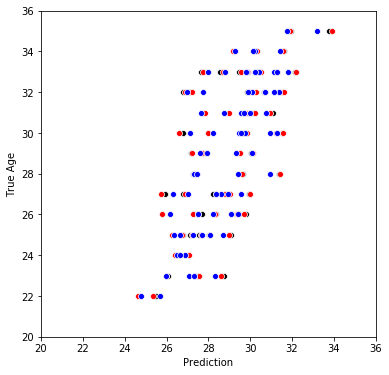

In [90]:
import os
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6)) # default is (8,6)


#y_test=np.genfromtxt('/data3/aki/bagging_prediction/Results/test_value.txt')


## base
datain='SVR_Base'
# /data3/aki/bagging_prediction/Results/SVR_Base/predict_base_random_seed_1.txt
mse_base=[]
corr_base=[]
idx=0
for i in range(1,52):
    f=datain + '/predict_random_seed_'+str(i)+'.txt'
    f_y=datain + '/test_y_random_seed_'+str(i)+'.txt'
    if os.path.isfile(f) and os.path.isfile(f_y):
        #print(f)
        predict=np.genfromtxt(f)
        y_test=np.genfromtxt(f_y)
        mse_base.append(np.mean(np.abs(predict-y_test)))
        corr_base.append(np.corrcoef(predict,y_test)[0,1])
sns.scatterplot(predict,y_test,color='black')
print(np.mean(mse_base),np.std(mse_base))


## Bagging 1 aggregate FC
datain='SVR_Bagging_1'
# /data3/aki/bagging_prediction/Results/SVR_Bagging_1/predict_base_random_seed_1.txt
mse_bagging1=[]
corr_bagging1=[]

idx=0
for i in range(1,52):
    f=datain + '/predict_random_seed_'+str(i)+'.txt'
    f_y=datain + '/test_y_random_seed_'+str(i)+'.txt'
    if os.path.isfile(f) and os.path.isfile(f_y):
        #print(f)
        predict=np.genfromtxt(f)
        y_test=np.genfromtxt(f_y)
        mse_bagging1.append(np.mean(np.abs(predict-y_test)))
        corr_bagging1.append(np.corrcoef(predict,y_test)[0,1])
print(np.mean(mse_bagging1),np.std(mse_bagging1))


sns.scatterplot(predict,y_test,color='Red')


## Bagging 2 aggregate prediction
datain='SVR_Bagging_2'
# /data3/aki/bagging_prediction/Results/SVR_Bagging_1/predict_base_random_seed_1.txt
mse_bagging2=[]
corr_bagging2=[]
idx=0
for i in range(1,52):
    idx=0
    for bs in range(0,100):
        # /data3/aki/bagging_prediction/Results/SVR_Bagging_2/predict_bs_0_random_seed_1.txt
        f=datain + '/predict_bs_'+str(bs)+'_random_seed_'+str(i)+'.txt'
        f_y=datain + '/test_y_bs_'+str(bs)+'_random_seed_'+str(i)+'.txt'
        if os.path.isfile(f) and os.path.isfile(f_y):
            predict_tmp=np.genfromtxt(f)
            y_test=np.genfromtxt(f_y)
            if idx==0:
                predict=predict_tmp
            else:
                predict = predict + predict_tmp
            idx += 1
    predict=predict/float(idx)
    mse_bagging2.append(np.mean(np.abs(predict-y_test)))
    corr_bagging2.append(np.corrcoef(predict,y_test)[0,1])
print(np.mean(mse_bagging2),np.std(mse_bagging2))
sns.scatterplot(predict,y_test,color='Blue')
plt.xlim([20,36])
plt.ylim([20,36])

print(stats.ttest_rel(mse_bagging1,mse_base))
print(stats.ttest_rel(mse_bagging2,mse_base))
plt.xlabel('Prediction')
plt.ylabel('True Age')

Text(0.5,1,'Mean Absolute Error')

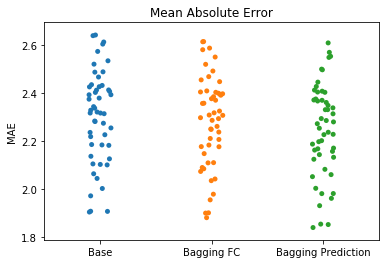

In [70]:
# plot jitter
# put them all into one dataframe
data=pd.concat([pd.DataFrame({"Type":['Base']*len(mse_base),"MAE":mse_base,"Correlation":corr_base}),
            pd.DataFrame({"Type":['Bagging FC']*len(mse_bagging1),"MAE":mse_bagging1,"Correlation":corr_bagging1}),
            pd.DataFrame({"Type":['Bagging Prediction']*len(mse_bagging2),"MAE":mse_bagging2,"Correlation":corr_bagging2})])
sns.stripplot(x="Type", y="MAE", data=data)
plt.xlabel('')
plt.title('Mean Absolute Error')

Text(0.5,1,'Correlation')

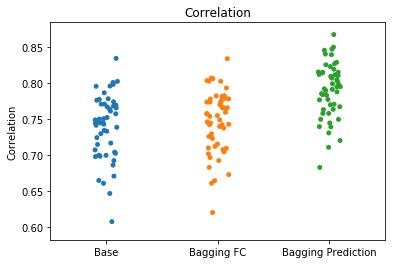

In [66]:
sns.stripplot(x="Type", y="Correlation", data=data)
plt.xlabel('')
plt.title('Correlation')